In [3]:
!pip install ppscore

In [9]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import ppscore as pps
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest

# Step 2: Load dataset
url = "https://raw.githubusercontent.com/Micahgs/DATA-science-asiignment-datasets/refs/heads/main/adult_with_headers.csv"
df = pd.read_csv(url)

# Preview
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
pps_matrix = pps.matrix(df)
pps_matrix.head()


C:\Users\Micah\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Micah\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Micah\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Micah\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Micah\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Micah\anaconda3\Lib\s

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.011232,classification,True,weighted F1,0.579088,0.583816,DecisionTreeClassifier()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,75872.186200,77535.141544,DecisionTreeRegressor()
3,age,education,0.052315,classification,True,weighted F1,0.201200,0.242989,DecisionTreeClassifier()
4,age,education_num,0.000000,regression,True,mean absolute error,1.853000,1.898306,DecisionTreeRegressor()


In [11]:
# Summary statistics
print(df.describe(include="all"))

# Data types and missing values
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)


                 age workclass        fnlwgt education  education_num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%        48.000000       NaN  2.370510e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

             marital_status       occupation relationship    race    sex  \
count                 32561            32561   

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Standard Scaler
standard_scaler = StandardScaler()
df_standard = df.copy()
df_standard[numeric_cols] = standard_scaler.fit_transform(df[numeric_cols])

# Min-Max Scaler
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = minmax_scaler.fit_transform(df[numeric_cols])

print("✅ Scaling complete.")


✅ Scaling complete.


In [13]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encode categorical columns with <5 unique values
low_cardinality_cols = [col for col in df.select_dtypes(include="object").columns if df[col].nunique() < 5]
df_encoded = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)

# Label Encode categorical columns with >=5 unique values
high_cardinality_cols = [col for col in df_encoded.select_dtypes(include="object").columns]
label_encoders = {}
for col in high_cardinality_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

print("✅ Encoding complete.")


✅ Encoding complete.


In [21]:
""" One-Hot Encoding (OHE)

Pros:

No ordinal assumption: Treats categories as independent — ideal when there’s no natural order (e.g., race, marital status).

Works well with linear models and distance-based algorithms (e.g., k-NN, SVM).

Prevents the model from interpreting category numbers as ordered values.

Cons:

High dimensionality: For columns with many unique values, OHE creates many new columns, increasing memory usage and risk of overfitting.

Sparse representation can slow down training for large datasets. """

' One-Hot Encoding (OHE)\n\nPros:\n\nNo ordinal assumption: Treats categories as independent — ideal when there’s no natural order (e.g., race, marital status).\n\nWorks well with linear models and distance-based algorithms (e.g., k-NN, SVM).\n\nPrevents the model from interpreting category numbers as ordered values.\n\nCons:\n\nHigh dimensionality: For columns with many unique values, OHE creates many new columns, increasing memory usage and risk of overfitting.\n\nSparse representation can slow down training for large datasets. '

In [15]:
#FE
import numpy as np

# Copy the encoded dataset to work on
df_fe = df_encoded.copy()

# --- New Feature 1: Net capital (gain - loss) ---
df_fe["net_capital"] = df_fe["capital_gain"] - df_fe["capital_loss"]

# --- New Feature 2: Age category ---
df_fe["age_group"] = pd.cut(df_fe["age"], 
                            bins=[0, 25, 45, 65, 100], 
                            labels=["Young", "Adult", "Mid_Age", "Senior"])

# Encode the new categorical feature
df_fe["age_group"] = LabelEncoder().fit_transform(df_fe["age_group"])

# --- Log Transformation on skewed feature ---
# Check skewness first
print("Capital Gain skewness:", df_fe["capital_gain"].skew())

# Apply log1p (log(1+x)) to handle zeros
df_fe["capital_gain_log"] = np.log1p(df_fe["capital_gain"])


Capital Gain skewness: 11.953847687699799


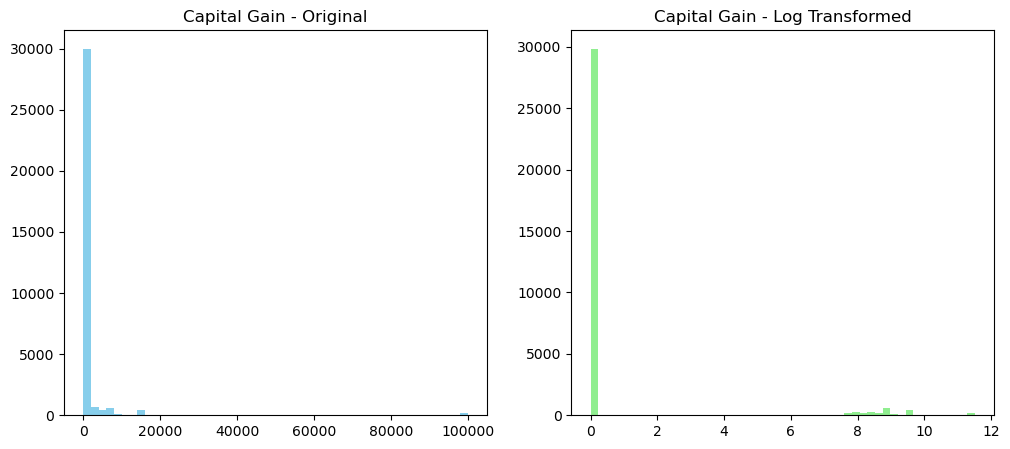

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df_fe["capital_gain"], bins=50, color='skyblue')
plt.title("Capital Gain - Original")

plt.subplot(1,2,2)
plt.hist(df_fe["capital_gain_log"], bins=50, color='lightgreen')
plt.title("Capital Gain - Log Transformed")

plt.show()


In [17]:
from sklearn.ensemble import IsolationForest

# We’ll use numerical columns for outlier detection
numeric_cols = df_fe.select_dtypes(include=["int64", "float64"]).columns

# Initialize Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)

# Fit and predict (-1 = outlier, 1 = inlier)
outlier_flags = iso.fit_predict(df_fe[numeric_cols])

# Add to dataframe for inspection
df_fe["outlier_flag"] = outlier_flags

# Remove outliers
df_no_outliers = df_fe[df_fe["outlier_flag"] == 1].drop(columns=["outlier_flag"])

print(f"Original shape: {df_fe.shape}")
print(f"After removing outliers: {df_no_outliers.shape}")


C:\Users\Micah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Original shape: (32561, 19)
After removing outliers: (32235, 18)


Top 10 PPS scores:
                  x               y  ppscore            case  is_valid_score  \
0               age             age      1.0  predict_itself            True   
152            race            race      1.0  predict_itself            True   
57        education       education      1.0  predict_itself            True   
58        education   education_num      1.0      regression            True   
75    education_num       education      1.0      regression            True   
76    education_num   education_num      1.0  predict_itself            True   
95   marital_status  marital_status      1.0  predict_itself            True   
114      occupation      occupation      1.0  predict_itself            True   
133    relationship    relationship      1.0  predict_itself            True   
171    capital_gain    capital_gain      1.0  predict_itself            True   

                  metric  baseline_score  model_score                    model  
0                  

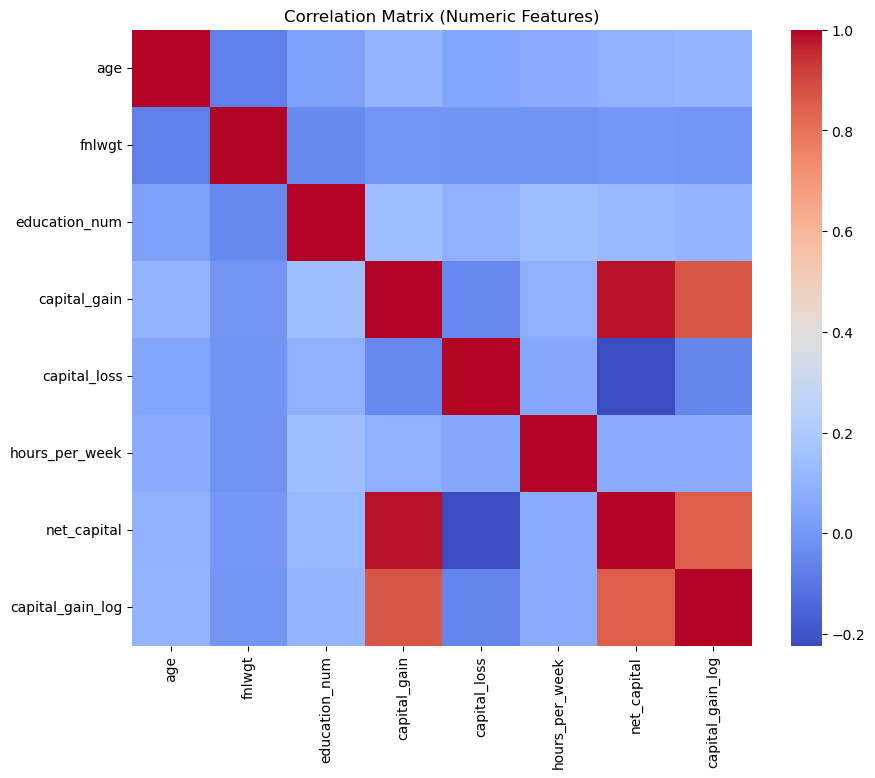

In [19]:
import ppscore as pps

# PPS matrix
pps_matrix = pps.matrix(df_no_outliers)
pps_matrix_sorted = pps_matrix.sort_values(by="ppscore", ascending=False)
print("Top 10 PPS scores:")
print(pps_matrix_sorted.head(10))

# Correlation matrix (only numeric)
corr_matrix = df_no_outliers.select_dtypes(include=["int64", "float64"]).corr()

# Display side by side (optional, in Jupyter)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


In [20]:
""" How Outliers Can Affect Model Performance

Outliers are data points that deviate significantly from the majority of observations. They can occur due to measurement errors, data entry mistakes, or genuine rare events. Regardless of the cause, they can heavily influence machine learning models:

Distorting Model Parameters

In regression models, a single extreme value can pull the regression line toward it, biasing predictions for the majority of cases.

Example: A house with a price 10× higher than the rest can distort the slope and intercept in linear regression.

Increasing Error Metrics

Outliers can cause loss functions such as Mean Squared Error (MSE) to spike, making the model seem less accurate than it actually is for typical cases.

Overfitting in Tree-Based Models

Decision trees may create unnecessary splits to perfectly classify rare outliers, leading to overfitting and poor generalization.

Impact on Distance-Based Algorithms

k-NN, clustering, and SVMs rely on distances. Outliers can shift centroids, margins, and neighborhood boundaries, leading to misclassification.

Skewed Scaling and Normalization

When applying Min-Max scaling, extreme values shrink the scale for all other observations, compressing normal values into a small range and reducing model sensitivity.

Bottom line: Outliers can degrade accuracy, reduce generalization, and bias model interpretation. Removing or treating them (e.g., via Isolation Forest, Z-score filtering, or transformation) helps produce more robust models. """

' How Outliers Can Affect Model Performance\n\nOutliers are data points that deviate significantly from the majority of observations. They can occur due to measurement errors, data entry mistakes, or genuine rare events. Regardless of the cause, they can heavily influence machine learning models:\n\nDistorting Model Parameters\n\nIn regression models, a single extreme value can pull the regression line toward it, biasing predictions for the majority of cases.\n\nExample: A house with a price 10× higher than the rest can distort the slope and intercept in linear regression.\n\nIncreasing Error Metrics\n\nOutliers can cause loss functions such as Mean Squared Error (MSE) to spike, making the model seem less accurate than it actually is for typical cases.\n\nOverfitting in Tree-Based Models\n\nDecision trees may create unnecessary splits to perfectly classify rare outliers, leading to overfitting and poor generalization.\n\nImpact on Distance-Based Algorithms\n\nk-NN, clustering, and SVMs

In [ ]:
"""PPS (Predictive Power Score) vs Correlation

We calculated the Predictive Power Score (PPS) for all feature pairs. PPS is an asymmetric, model-based score that works for numeric and categorical data and can detect non-linear relationships.

Key Observations from PPS:

Self-predicting variables (e.g., age → age, education → education) have PPS = 1.0 by definition.

Strong predictors of income included:

marital_status → income

education → income

occupation → income

Some of these had low correlation values but high PPS scores, showing PPS's ability to detect non-linear and categorical relationships.

Comparison with Correlation Matrix:

Correlation measures linear relationships between two numeric variables and is symmetric (corr(X,Y) = corr(Y,X)).

PPS can capture any predictive relationship (linear or non-linear) between any data types and is asymmetric (PPS(X,Y) ≠ PPS(Y,X)).

In this dataset:

Correlation worked well for pairs like education_num and education, showing a perfect relationship.

PPS additionally revealed that marital_status and occupation have high predictive power for income, despite low correlation scores after encoding.

Conclusion:
PPS provides a more comprehensive view of feature usefulness in mixed-type datasets, while correlation is still valuable for quick numeric-only linear checks. """